# 00. PyTorch Fundamentals

Welcome to PyTorch! This notebook serves as your introduction to the fundamentals of PyTorch, one of the most popular deep learning frameworks.

By the end of this notebook, you'll understand:

- What PyTorch is and why it's important
- How to set up your PyTorch environment
- The core concepts that make PyTorch powerful
- How PyTorch fits into the machine learning workflow


## What is PyTorch?

PyTorch is an open-source machine learning framework developed by Meta's AI Research lab. It's designed to provide:

1. **Tensors**: Multi-dimensional arrays similar to NumPy, but with GPU acceleration
2. **Automatic Differentiation**: Automatic computation of gradients for optimization
3. **Neural Network Building Blocks**: Pre-built layers and functions for deep learning
4. **Dynamic Computation Graphs**: Flexibility to change network behavior on-the-fly

### Why PyTorch?

PyTorch has become incredibly popular because:

- **Pythonic**: Feels natural to Python developers
- **Dynamic**: Can change network architecture during runtime
- **Debugging Friendly**: Easy to debug with standard Python tools
- **Research Friendly**: Quick prototyping and experimentation
- **Production Ready**: Can deploy models to production environments

### PyTorch vs Other Frameworks

| Framework        | Pros                                  | Cons                                 |
| ---------------- | ------------------------------------- | ------------------------------------ |
| **PyTorch**      | Dynamic, Pythonic, Great for research | Smaller ecosystem than TensorFlow    |
| **TensorFlow**   | Large ecosystem, Great for production | More complex, Static graphs (TF 1.x) |
| **JAX**          | Functional programming, Fast          | Steep learning curve                 |
| **Scikit-learn** | Simple, Great for classical ML        | Limited deep learning capabilities   |


## Setting Up PyTorch

Let's start by importing PyTorch and checking our installation.


In [10]:
# Import PyTorch and related libraries
import torch
import numpy as np
import matplotlib.pyplot as plt

# Check PyTorch version
print(f"PyTorch version: {torch.__version__}")

# Check if CUDA (GPU) is available
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA device: {torch.cuda.get_device_name(0)}")
    print(f"Number of CUDA devices: {torch.cuda.device_count()}")
else:
    print("Running on CPU")

# Check MPS (Apple Silicon GPU) availability
if hasattr(torch.backends, "mps") and torch.backends.mps.is_available():
    print("MPS (Apple Silicon GPU) is available")
else:
    print("MPS not available")

PyTorch version: 2.7.1
CUDA available: False
Running on CPU
MPS (Apple Silicon GPU) is available


## Core PyTorch Concepts

### 1. Device Management

One of the first things to understand in PyTorch is device management. You need to specify where your computations should happen: CPU, CUDA GPU, or MPS (Apple Silicon).


In [11]:
# Set device for computations
if torch.cuda.is_available():
    device = torch.device("cuda")
elif hasattr(torch.backends, "mps") and torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

print(f"Using device: {device}")

# Create a tensor on the specified device
x = torch.tensor([1, 2, 3, 4, 5], device=device)
print(f"Tensor: {x}")
print(f"Tensor device: {x.device}")
print(f"Tensor dtype: {x.dtype}")

Using device: mps
Tensor: tensor([1, 2, 3, 4, 5], device='mps:0')
Tensor device: mps:0
Tensor dtype: torch.int64


### 2. The Machine Learning Workflow with PyTorch

PyTorch follows a standard machine learning workflow:

1. **Data Preparation**: Load and preprocess your data
2. **Model Definition**: Define your neural network architecture
3. **Loss Function**: Define how to measure model performance
4. **Optimizer**: Choose how to update model parameters
5. **Training Loop**: Train the model
6. **Evaluation**: Test the model's performance
7. **Prediction**: Use the model on new data

Let's see a simple example of this workflow:


Data shape - X: torch.Size([100, 1]), y: torch.Size([100, 1])
True parameters - Weight: 3.5, Bias: -2.0


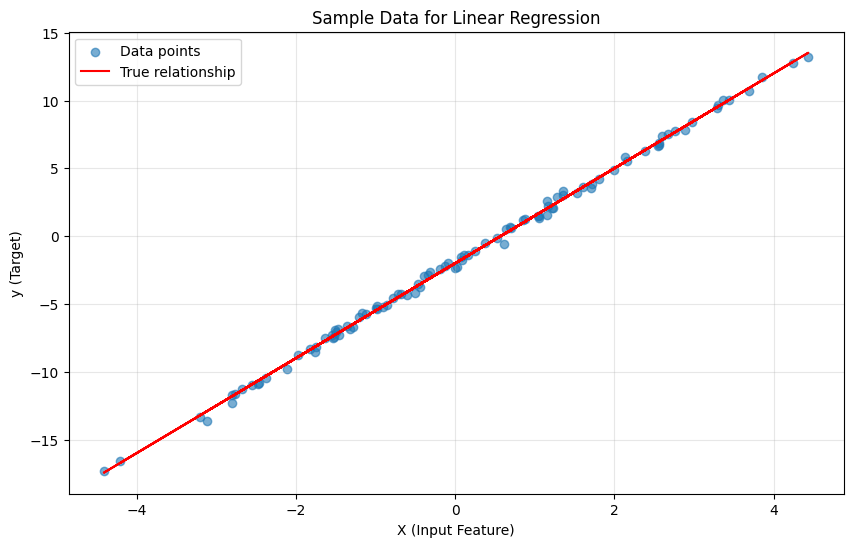

In [12]:
# Simple example: Linear regression
# Generate some sample data
torch.manual_seed(42)
n_samples = 100
X = torch.randn(n_samples, 1) * 2  # Random input features
true_weight = 3.5
true_bias = -2.0
noise = torch.randn(n_samples, 1) * 0.3
y = true_weight * X + true_bias + noise  # Linear relationship with noise

print(f"Data shape - X: {X.shape}, y: {y.shape}")
print(f"True parameters - Weight: {true_weight}, Bias: {true_bias}")

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X.numpy(), y.numpy(), alpha=0.6, label="Data points")
plt.plot(
    X.numpy(), (true_weight * X + true_bias).numpy(), "r-", label="True relationship"
)
plt.xlabel("X (Input Feature)")
plt.ylabel("y (Target)")
plt.title("Sample Data for Linear Regression")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 3. PyTorch's Autograd System

One of PyTorch's most powerful features is automatic differentiation (autograd). This allows PyTorch to automatically compute gradients for optimization.


In [13]:
# Demonstrate autograd with a simple function
# Let's compute the derivative of y = x^2 + 3x + 1 at x = 2
# The analytical derivative is: dy/dx = 2x + 3 = 2(2) + 3 = 7

x = torch.tensor(
    2.0, requires_grad=True
)  # requires_grad=True enables gradient computation
y = x**2 + 3 * x + 1

print(f"x = {x.item()}")
print(f"y = x^2 + 3x + 1 = {y.item()}")

# Compute gradient
y.backward()  # This computes dy/dx

print(f"dy/dx at x=2: {x.grad.item()}")
print(f"Expected (analytical): 2*2 + 3 = 7")

x = 2.0
y = x^2 + 3x + 1 = 11.0
dy/dx at x=2: 7.0
Expected (analytical): 2*2 + 3 = 7


### 4. Building Blocks: Modules and Parameters

PyTorch provides building blocks for creating neural networks through the `torch.nn` module.


In [14]:
from torch import nn

# Create a simple linear layer
linear_layer = nn.Linear(in_features=1, out_features=1)  # 1 input, 1 output

print("Linear layer structure:")
print(linear_layer)

# Check the parameters
print("\nParameters:")
for name, param in linear_layer.named_parameters():
    print(f"{name}: {param.data}")
    print(f"  Shape: {param.shape}")
    print(f"  Requires grad: {param.requires_grad}")

Linear layer structure:
Linear(in_features=1, out_features=1, bias=True)

Parameters:
weight: tensor([[0.4801]])
  Shape: torch.Size([1, 1])
  Requires grad: True
bias: tensor([0.8415])
  Shape: torch.Size([1])
  Requires grad: True


### 5. Putting It All Together: A Complete Mini-Example

Let's create a complete mini example that demonstrates the PyTorch workflow:


In [15]:
# 1. Model Definition
class SimpleLinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)


# 2. Create model, loss function, and optimizer
model = SimpleLinearModel().to(device)
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent

print("Initial model parameters:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data.item():.4f}")

# Move data to device
X = X.to(device)
y = y.to(device)

X = X.detach()
y = y.detach()


# 3. Simple training loop
epochs = 100
losses = []

for epoch in range(epochs):
    # Forward pass
    predictions = model(X)
    loss = criterion(predictions, y)

    # Backward pass
    optimizer.zero_grad()  # Clear previous gradients
    loss.backward()  # Compute gradients
    optimizer.step()  # Update parameters

    losses.append(loss.item())

    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

print("\nFinal model parameters:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data.item():.4f}")

print(f"\nTrue parameters - Weight: {true_weight}, Bias: {true_bias}")

Initial model parameters:
linear.weight: 0.5239
linear.bias: 0.2531
Epoch 20/100, Loss: 53.6642
Epoch 40/100, Loss: 24.0150
Epoch 60/100, Loss: 10.7471
Epoch 80/100, Loss: 4.8095
Epoch 100/100, Loss: 2.1523

Final model parameters:
linear.weight: 0.0600
linear.bias: 9.5598

True parameters - Weight: 3.5, Bias: -2.0
Epoch 100/100, Loss: 2.1523

Final model parameters:
linear.weight: 0.0600
linear.bias: 9.5598

True parameters - Weight: 3.5, Bias: -2.0


### 6. Visualizing Training Progress


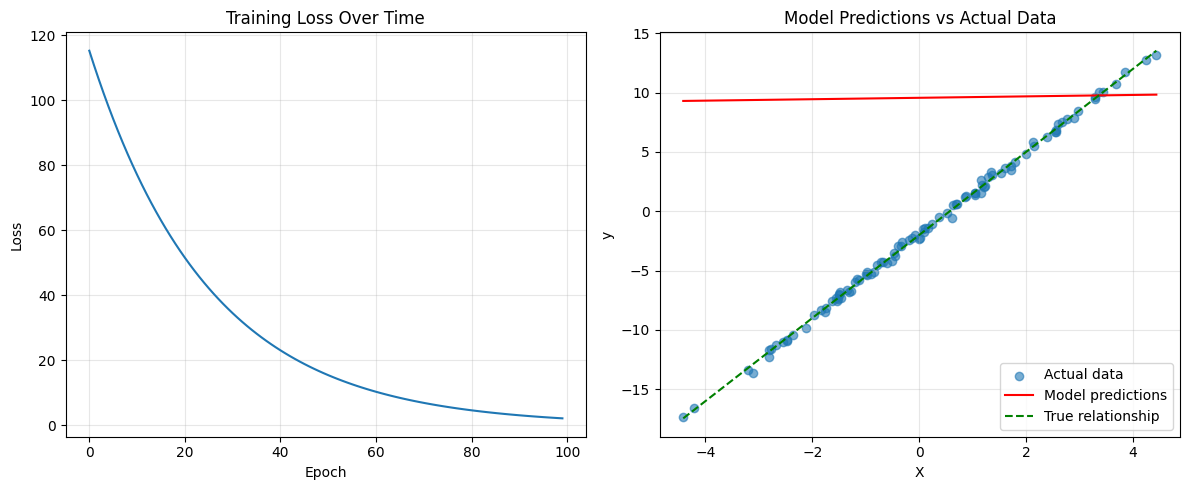

In [ ]:
# Plot training loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Training Loss Over Time")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True, alpha=0.3)

# Plot predictions vs actual
plt.subplot(1, 2, 2)
with torch.inference_mode():  # Don't track gradients for inference
    model.eval()  # Set model to evaluation mode

    # Recreate the original data to avoid using corrupted tensors
    torch.manual_seed(42)  # Same seed as original data generation
    X_original = torch.randn(n_samples, 1) * 2
    y_original = true_weight * X_original + true_bias + torch.randn(n_samples, 1) * 0.3

    # Move to device for model inference
    X_plot = X_original.to(device)
    predictions = model(X_plot)

    # Move to CPU for plotting
    X_cpu = X_plot.cpu()
    y_cpu = y_original  # Use original y data
    pred_cpu = predictions.cpu()

    # Flatten to 1D arrays and ensure they match
    X_np = X_cpu.numpy().flatten()
    y_np = y_cpu.numpy().flatten()
    pred_np = pred_cpu.numpy().flatten()
    true_np = (true_weight * X_cpu + true_bias).numpy().flatten()

    # Sort for line plots
    sort_idx = X_np.argsort()
    X_sorted = X_np[sort_idx]
    pred_sorted = pred_np[sort_idx]
    true_sorted = true_np[sort_idx]

    # Scatter plot (actual data)
    plt.scatter(X_np, y_np, alpha=0.6, label="Actual data")

    # Line plots (sorted for smoothness)
    plt.plot(X_sorted, pred_sorted, "r-", label="Model predictions")
    plt.plot(X_sorted, true_sorted, "g--", label="True relationship")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Model Predictions vs Actual Data")
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Key PyTorch Concepts Summary

Here are the fundamental concepts you've learned:

### 1. **Device Management**

- Always be aware of where your tensors and models are (CPU, CUDA, MPS)
- Use `.to(device)` to move tensors and models to the appropriate device

### 2. **Autograd (Automatic Differentiation)**

- Set `requires_grad=True` on tensors that need gradients
- Use `.backward()` to compute gradients
- Use `torch.inference_mode()` when you don't need gradients (e.g., during inference)

### 3. **Neural Network Building**

- Inherit from `nn.Module` to create custom models
- Define layers in `__init__()` and the forward pass in `forward()`
- Use pre-built layers from `torch.nn`

### 4. **Training Loop**

- Forward pass: `predictions = model(data)`
- Compute loss: `loss = criterion(predictions, targets)`
- Backward pass: `loss.backward()`
- Update parameters: `optimizer.step()`
- Clear gradients: `optimizer.zero_grad()`

### 5. **Model States**

- `model.train()`: Sets model to training mode (enables dropout, batch norm updates)
- `model.eval()`: Sets model to evaluation mode (disables dropout, batch norm updates)


## Next Steps

Now that you understand PyTorch fundamentals, you're ready to explore:

1. **[01. Tensor Operations](01_tensor_operations.ipynb)**: Deep dive into tensor creation and manipulation
2. **[02. Neural Networks](02_neural_networks.ipynb)**: Understand the theory behind neural networks
3. **[03. Neural Networks in PyTorch](03_neural_networks_in_pytorch.ipynb)**: Implement neural networks step by step
4. **[04. Classification](04_classification.ipynb)**: Apply neural networks to classification problems

Remember: PyTorch is a powerful framework, but the key to mastering it is practice. Don't worry if everything doesn't click immediately – it takes time to become comfortable with these concepts!
